In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from datasets import Dataset

import torch
from torch import nn
import transformers
from transformers import AutoTokenizer


from tqdm import tqdm
from datetime import datetime

c:\Users\aiwinuser\Documents\WissenAssistant\PyWissenAssistant\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from IPython.display import display

pd.options.display.max_columns = None

In [2]:
Data_Raw_Wissen_1 = pd.read_excel('../Data/One_Year_Ticket_Report_2024.xlsx', sheet_name='Raw_Data(ITOP & Helpdesk)')
Data_Raw_Wissen_2 = pd.read_csv('../Data/Tickets_CSV_Report2024_12_06_54_05.csv')

In [5]:
Data_Raw_Wissen_2.head()

,ID,Issue,Service,Service Sub Category,Impact,Urgency,Description,Ticket Sub Class,Status,Created By,TTO Deadline,Assigned To,Caller Name,Responsible Team,Location Value,Root Cause,Action Taken,Feeedback,Ratings,Request Type,Assigned Date,Resolved Date,Closed Date,Comments,Re-Assign To,Month,Color Tag,Modified By,Created Date,Modified Date,Re-Assigned Time,Total Resolution Time,Re-Assigned Resolution Time,Ticket Open Time
0,361,Laptop for 7671,Computer Hardware,New Hardware Request,A person,Critical,make a laptop ready for new joinee.,NaN,Assigned,Ravipati Ranga Dhama Reddy,NaN,Sivabharathi Dudekula,Sivabharathi Dudekula,IT IS Support,Bangalore,laptop Make ready,Laptop was ready with all the os booted and th...,NaN,NaN,Service,5/15/2024 10:33 PM,1/12/2024 12:33 PM,NaN,NaN,sivabharathi.dudekula@wisseninfotech.com,NaN,NaN,Mrdhul Kumar,"18/08/2023, 08:34:02","15/05/2024, 17:03:10",NaN,NaN,NaN,NaN
1,364,Software Installation,Software,MS Office,A person,Critical,Software Installation,NaN,Resolved,Meghana Dharmaraj,NaN,Mahendar Battula,Meghana Dharmaraj,IT IS Support,Bangalore,installed required software,installed required software,NaN,NaN,Service,8/18/2023 5:48 PM,8/18/2023 6:53 PM,NaN,NaN,NaN,NaN,NaN,Raksha Roshni,"18/08/2023, 12:15:45","22/05/2024, 13:33:21",NaN,NaN,NaN,NaN
2,365,Software Installation,Software,MS Office,A person,Critical,Software Installation,NaN,Resolved,Meghana Dharmaraj,NaN,Mahendar Battula,Meghana Dharmaraj,IT IS Support,Bangalore,installed required software,installed required software,NaN,NaN,Service,8/18/2023 5:48 PM,8/18/2023 6:53 PM,NaN,NaN,NaN,NaN,NaN,Raksha Roshni,"18/08/2023, 12:17:13","22/05/2024, 13:33:21",NaN,NaN,NaN,NaN
3,366,Software Installation,Software,MS Office,A person,Critical,Software Installation,NaN,Resolved,Meghana Dharmaraj,NaN,Mahendar Battula,Meghana Dharmaraj,IT IS Support,Bangalore,installed required software,installed required software,NaN,NaN,Service,8/18/2023 5:49 PM,8/18/2023 6:54 PM,NaN,NaN,NaN,NaN,NaN,Raksha Roshni,"18/08/2023, 12:17:41","22/05/2024, 13:33:22",NaN,NaN,NaN,NaN
4,367,Software Installation,Software,MS Office,A person,Critical,Software Installation,NaN,Resolved,Meghana Dharmaraj,NaN,Mahendar Battula,Meghana Dharmaraj,IT IS Support,Bangalore,installed required software,installed required software,NaN,NaN,Service,8/18/2023 5:59 PM,8/18/2023 6:54 PM,NaN,NaN,NaN,NaN,NaN,Raksha Roshni,"18/08/2023, 12:19:37","22/05/2024, 13:33:22",NaN,NaN,NaN,NaN


In [6]:
Data_Wissen_1 = Data_Raw_Wissen_1[['Service Category', 'Service Sub Category', 'Description of Ticket']]
Data_Wissen_2 = Data_Raw_Wissen_2[['Service', 'Description']]
Data_Wissen_1 = Data_Wissen_1.dropna(subset=['Description of Ticket'])
Data_Wissen_2 = Data_Wissen_2.dropna(subset=['Description'])

Data_Wissen_1_additional = Data_Raw_Wissen_1[['Service Category', 'Description of Ticket', 'Service Sub Category', 'Title Of the Ticket']]
Data_Wissen_2_additional = Data_Raw_Wissen_2[['Service', 'Description', 'Service Sub Category', 'Issue', 'Request Type']]
Data_Wissen_1_additional = Data_Wissen_1_additional.dropna(subset=['Description of Ticket'])
Data_Wissen_2_additional = Data_Wissen_2_additional.dropna(subset=['Description'])

In [8]:
Data_Wissen_2_additional['Category'] = Data_Wissen_2_additional['Service'] + "_"+ Data_Wissen_2_additional['Service Sub Category']

In [9]:
Data_Wissen_2_additional = Data_Wissen_2_additional.dropna(subset=['Category'])
Data_Wissen_2_additional.head()

,Service,Description,Service Sub Category,Issue,Request Type,Category
0,Computer Hardware,make a laptop ready for new joinee.,New Hardware Request,Laptop for 7671,Service,Computer Hardware_New Hardware Request
1,Software,Software Installation,MS Office,Software Installation,Service,Software_MS Office
2,Software,Software Installation,MS Office,Software Installation,Service,Software_MS Office
3,Software,Software Installation,MS Office,Software Installation,Service,Software_MS Office
4,Software,Software Installation,MS Office,Software Installation,Service,Software_MS Office


In [10]:
Data_Wissen_2_additional_Classes = list(set(Data_Wissen_2_additional['Category'].tolist()))
print(Data_Wissen_2_additional_Classes)

['User Account_Password Reset', 'Computer Hardware_Audio/Webcam issue', 'Network_Client Network', 'Internet/Network/Telecom_Client Network Access Error', 'Access Requests_Admin Rights', 'Software_MS Office', 'Software_New Software Request', 'Software_Client Provided S/W', 'Computer Hardware_Hardware Failure', 'User Account_Login Issue', 'User Account_Account Locked', 'Software_Other', 'Internet/Network/Telecom_Wi-Fi Access ', 'Computer Hardware_New Hardware Request', 'Access Requests_Application Access', 'Access Requests_USB Access', 'Access Requests_VPN', 'Internet/Network/Telecom_Network Error', 'Software_Outlook Configuration', 'Internet/Network/Telecom_Website Access', 'Internet/Network/Telecom_Others ', 'Software_Operating System Issue', 'Computer Hardware_Others', 'Software_Software Error', 'Conference/ Training Room Booking_4th Floor Conference/Training Room Booking(BLR)', 'Access Requests_Website Access', 'Access Requests_Others', 'Network_FireWall and Switches', 'Computer Hard

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
print(Data_Wissen_2_additional['Category'].value_counts())
print('\n')
# print(Data_Wissen_2['Service'].value_counts())

Category
Computer Hardware_New Hardware Request                                               1395
Software_New Software Request                                                        1214
Computer Hardware_Others                                                              840
Software_Other                                                                        551
Software_Software Error                                                               296
Software_MS Office                                                                    204
Access Requests_Others                                                                174
Computer Hardware_Hardware Failure                                                    100
Software_Outlook Configuration                                                         94
Software_Microsoft Teams Issue                                                         79
User Account_Login Issue                                                               67
U

In [12]:
# Select only instance with count more than 100(some threshold)
Data_Wissen_2_additional_VC = Data_Wissen_2_additional['Category'].value_counts()#.to_frame()
Data_Wissen_2_additional_tmp = Data_Wissen_2_additional_VC[Data_Wissen_2_additional_VC > 40]

# Data_Wissen_Class_DF['Service Sub Category'].value_counts()
Class_Names_Above100 = Data_Wissen_2_additional_tmp.index.tolist()
Data_Wissen_2_Above100 = Data_Wissen_2_additional[Data_Wissen_2_additional['Category'].isin(Class_Names_Above100)]

In [13]:
label_encoder = preprocessing.LabelEncoder()
Data_Wissen_2_Above100['label'] = label_encoder.fit_transform(Data_Wissen_2_Above100['Category'].tolist())
Data_Wissen_2_Above100.head()

C:\Users\aiwinuser\AppData\Local\Temp\2\ipykernel_2204\451375353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Wissen_2_Above100['label'] = label_encoder.fit_transform(Data_Wissen_2_Above100['Category'].tolist())


,Service,Description,Service Sub Category,Issue,Request Type,Category,label
0,Computer Hardware,make a laptop ready for new joinee.,New Hardware Request,Laptop for 7671,Service,Computer Hardware_New Hardware Request,2
1,Software,Software Installation,MS Office,Software Installation,Service,Software_MS Office,5
2,Software,Software Installation,MS Office,Software Installation,Service,Software_MS Office,5
3,Software,Software Installation,MS Office,Software Installation,Service,Software_MS Office,5
4,Software,Software Installation,MS Office,Software Installation,Service,Software_MS Office,5


In [14]:
dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

{'Access Requests_Others': 0,
 'Computer Hardware_Hardware Failure': 1,
 'Computer Hardware_New Hardware Request': 2,
 'Computer Hardware_Others': 3,
 'Internet/Network/Telecom_Network Error': 4,
 'Software_MS Office': 5,
 'Software_Microsoft Teams Issue': 6,
 'Software_New Software Request': 7,
 'Software_Other': 8,
 'Software_Outlook Configuration': 9,
 'Software_Software Error': 10,
 'User Account_Login Issue': 11,
 'User Account_Password Reset': 12}

In [15]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [16]:
# train_df, test_df = train_test_split(Data_Wissen_Class_100_DF, test_size=0.2, shuffle=True, stratify=Data_Wissen_Class_100_DF['Description of Ticket'])
train_df, test_df = train_test_split(Data_Wissen_2_Above100, test_size=0.2, shuffle=True)

# Convert datasets to tokenized format
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

In [18]:
X_list = Data_Wissen_2_Above100['Description'].to_list()
X_pt   = tokenizer(X_list, padding='max_length', max_length = 512, truncation=True, return_tensors='pt')["input_ids"]

y_list = np.unique(Data_Wissen_2_Above100['label'], return_inverse=True)[1]
y_pt   = torch.Tensor(y_list).long()

X_pt_train, X_pt_test, y_pt_train, y_pt_test = train_test_split(X_pt, y_pt, test_size=0.2, random_state=42, stratify=y_pt)

In [19]:
from torch.utils.data import Dataset, DataLoader

In [20]:
class ClassificationDataset(Dataset):
    """Custom-built Wissen-Ticket dataset"""

    def __init__(self, X, y):
        """
        Args:
            X, y as Torch tensors
        """
        self.X_train = X
        self.y_train = y

    def __len__(self):
        return len(self.y_train)

    def __getitem__(self, idx):
        return self.X_train[idx], self.y_train[idx]

# Get train and test data in form of Dataset class
train_data_pt = ClassificationDataset(X=X_pt_train, y=y_pt_train)
test_data_pt = ClassificationDataset(X=X_pt_test, y=y_pt_test)

In [21]:
# Get train and test data in form of Dataloader class
train_loader_pt = DataLoader(train_data_pt, batch_size=32)
test_loader_pt = DataLoader(test_data_pt, batch_size=32)

In [30]:
config = transformers.DistilBertConfig(dropout=0.2, attention_dropout=0.2)
dbert_pt = transformers.DistilBertModel.from_pretrained('distilbert-base-uncased', config=config)

In [31]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [32]:
class DistilBertClassification(nn.Module):
    def __init__(self):
        super(DistilBertClassification, self).__init__()
        self.dbert = dbert_pt
        self.dropout = nn.Dropout(p=0.2)
        self.linear1 = nn.Linear(768,64)
        self.ReLu = nn.ReLU()
        self.linear2 = nn.Linear(64,13)

    def forward(self, x):
        x = self.dbert(input_ids=x)
        x = x["last_hidden_state"][:,0,:]
        x = self.dropout(x)
        x = self.linear1(x)
        x = self.ReLu(x)
        logits = self.linear2(x)
        # No need for a softmax, because it is already included in the CrossEntropyLoss
        return logits

model_pt = DistilBertClassification().to(device)

In [33]:
for param in model_pt.dbert.parameters():
    param.requires_grad = False

In [34]:
total_params = sum(p.numel() for p in model_pt.parameters())
total_params_trainable = sum(p.numel() for p in model_pt.parameters() if p.requires_grad)
print("Number of parameters: ", total_params)
print("Number of trainable parameters: ", total_params_trainable)

Number of parameters:  66412941
Number of trainable parameters:  50061


In [35]:
for param in list(model_pt.dbert.parameters())[:-99]:
    # print('I will be frozen: {}'.format(name))
    param.requires_grad = True

In [36]:
total_params = sum(p.numel() for p in model_pt.parameters())
total_params_trainable = sum(p.numel() for p in model_pt.parameters() if p.requires_grad)
print("Number of parameters: ", total_params)
print("Number of trainable parameters: ", total_params_trainable)

Number of parameters:  66412941
Number of trainable parameters:  23490957


In [37]:
epochs = 10
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_pt.parameters())
from tqdm import tqdm
# Define the dictionary "history" that will collect key performance indicators during training
history = {}
history["epoch"]=[]
history["train_loss"]=[]
history["valid_loss"]=[]
history["train_accuracy"]=[]
history["valid_accuracy"]=[]

# Measure time for training
start_time = datetime.now()

# Loop on epochs
for e in range(epochs):

    # Set mode in train mode
    model_pt.train()

    train_loss = 0.0
    train_accuracy = []

    # Loop on batches
    for X, y in tqdm(train_loader_pt):

        X, y = X.to(device), y.to(device)
        # Get prediction & loss
        prediction = model_pt(X)
        loss = criterion(prediction, y)

        # Adjust the parameters of the model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        prediction_index = prediction.argmax(axis=1)
        accuracy = (prediction_index==y)
        train_accuracy += accuracy

    train_accuracy = (sum(train_accuracy) / len(train_accuracy)).item()

    # Calculate the loss on the test data after each epoch
    # Set mode to evaluation (by opposition to training)
    model_pt.eval()
    valid_loss = 0.0
    valid_accuracy = []
    for X, y in test_loader_pt:

        X, y = X.to(device), y.to(device)
        prediction = model_pt(X)
        loss = criterion(prediction, y)

        valid_loss += loss.item()

        prediction_index = prediction.argmax(axis=1)
        accuracy = (prediction_index==y)
        valid_accuracy += accuracy
    valid_accuracy = (sum(valid_accuracy) / len(valid_accuracy)).item()

    # Populate history
    history["epoch"].append(e+1)
    history["train_loss"].append(train_loss / len(train_loader_pt))
    history["valid_loss"].append(valid_loss / len(test_loader_pt))
    history["train_accuracy"].append(train_accuracy)
    history["valid_accuracy"].append(valid_accuracy)

    print(f'Epoch {e+1} \t\t Training Loss: {train_loss / len(train_loader_pt) :10.3f} \t\t Validation Loss: {valid_loss / len(test_loader_pt) :10.3f}')
    print(f'\t\t Training Accuracy: {train_accuracy :10.3%} \t\t Validation Accuracy: {valid_accuracy :10.3%}')

# Measure time for training
end_time = datetime.now()
training_time_pt = (end_time - start_time).total_seconds()

100%|██████████| 129/129 [02:13<00:00,  1.04s/it]


Epoch 1 		 Training Loss:      1.810 		 Validation Loss:      1.480
		 Training Accuracy:    39.805% 		 Validation Accuracy:    50.244%


100%|██████████| 129/129 [02:17<00:00,  1.07s/it]


Epoch 2 		 Training Loss:      1.380 		 Validation Loss:      1.297
		 Training Accuracy:    55.488% 		 Validation Accuracy:    60.098%


100%|██████████| 129/129 [02:17<00:00,  1.07s/it]


Epoch 3 		 Training Loss:      1.145 		 Validation Loss:      1.174
		 Training Accuracy:    63.415% 		 Validation Accuracy:    62.439%


100%|██████████| 129/129 [02:17<00:00,  1.07s/it]


Epoch 4 		 Training Loss:      0.995 		 Validation Loss:      1.128
		 Training Accuracy:    67.878% 		 Validation Accuracy:    63.415%


100%|██████████| 129/129 [02:17<00:00,  1.07s/it]


Epoch 5 		 Training Loss:      0.870 		 Validation Loss:      1.084
		 Training Accuracy:    72.171% 		 Validation Accuracy:    66.244%


100%|██████████| 129/129 [02:17<00:00,  1.07s/it]


Epoch 6 		 Training Loss:      0.754 		 Validation Loss:      1.109
		 Training Accuracy:    75.317% 		 Validation Accuracy:    65.951%


100%|██████████| 129/129 [02:17<00:00,  1.07s/it]


Epoch 7 		 Training Loss:      0.678 		 Validation Loss:      1.151
		 Training Accuracy:    78.341% 		 Validation Accuracy:    65.561%


100%|██████████| 129/129 [02:17<00:00,  1.07s/it]


Epoch 8 		 Training Loss:      0.586 		 Validation Loss:      1.227
		 Training Accuracy:    81.439% 		 Validation Accuracy:    64.780%


100%|██████████| 129/129 [02:17<00:00,  1.07s/it]


Epoch 9 		 Training Loss:      0.526 		 Validation Loss:      1.228
		 Training Accuracy:    83.293% 		 Validation Accuracy:    64.976%


100%|██████████| 129/129 [02:17<00:00,  1.07s/it]


Epoch 10 		 Training Loss:      0.478 		 Validation Loss:      1.256
		 Training Accuracy:    84.341% 		 Validation Accuracy:    65.268%


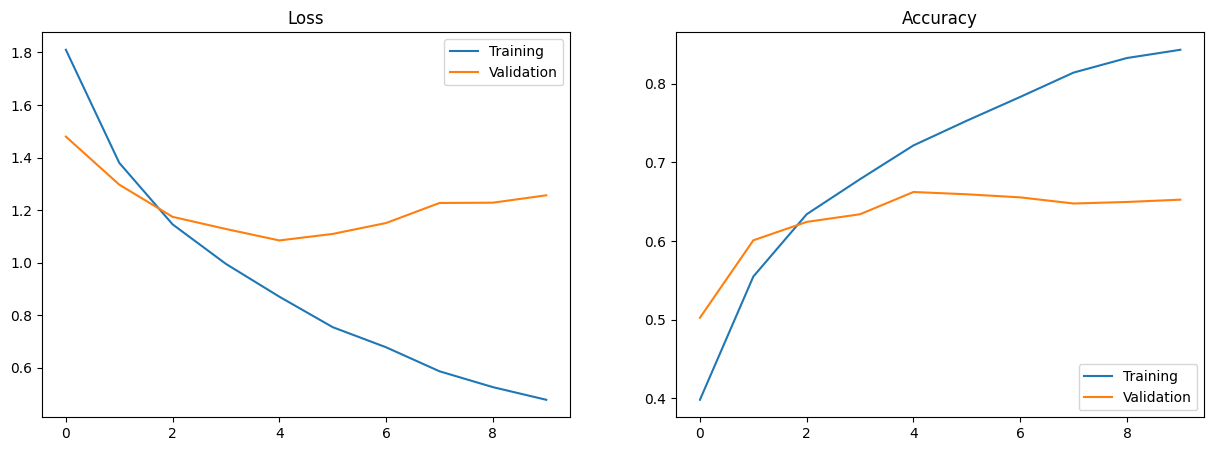

In [38]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].set(title='Loss')
ax[0].plot(history['train_loss'], label='Training')
ax[0].plot(history['valid_loss'], label='Validation')
ax[0].legend(loc="upper right")

ax[1].set(title='Accuracy')
ax[1].plot(history['train_accuracy'], label='Training')
ax[1].plot(history['valid_accuracy'], label='Validation')
ax[1].legend(loc="lower right")

In [29]:
accuracy_pt = history['valid_accuracy'][-1]
print('Accuracy Training data: {:.1%}'.format(history['train_accuracy'][-1]))
print('Accuracy Test data: {:.1%}'.format(history['valid_accuracy'][-1]))
print('Training time: {:.1f}s (or {:.1f} minutes)'.format(training_time_pt, training_time_pt/60))

Accuracy Training data: 34.7%
Accuracy Test data: 35.5%
Training time: 833.3s (or 13.9 minutes)


In [29]:
# Save only the parameters of the model but not the model itself, and get it back
torch.save(model_pt.state_dict(), './PyModel_V1/PyModel_V1.sd')
model_reloaded = DistilBertClassification()
model_reloaded.load_state_dict(torch.load('./PyModel_V1/PyModel_V1.sd'))
model_reloaded.eval()

DistilBertClassification(
  (dbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.2, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.2, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.2, inplace=False)
            (lin1

In [30]:
# Save the entire model, and get it back
torch.save(model_pt, './PyModel_V1/PyModelComplete_V1.pt')
model_reloaded2 = torch.load('./PyModel_V1/PyModelComplete_V1.pt')
model_reloaded2.eval()

DistilBertClassification(
  (dbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.2, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.2, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.2, inplace=False)
            (lin1